In [72]:
import lmfit
import numpy as np
import sympy
from sympy import symbols, I
import matplotlib.pyplot as plt
from math import pi
import cmath

z, l0, l1, l2 = symbols('z 10 l1 l2')
def s11_complex(f, z, l0, l1, l2):
    return (z - 2*pi*cmath.I*(l0 + l1*f + l2*f**2))/(z + 2*pi*cmath.I*(l0 + l1*f + l2*f**2))

def conv(l):
    for i in range(len(l)):
        l[i] = complex(l[i])
    return l

def s11_simple(f, z, l0):
    return (z - 2*pi*f*l0)/(z + 2*pi*f*l0)

# sympy.pprint(s11(sympy.symbols('f')), use_unicode=False)

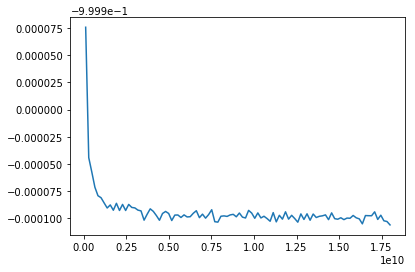

In [2]:
f = np.linspace(1e8, 18e9, 100)
s = s11_simple(f=f, z=50, l0=.000910) + 0.000003*np.random.randn(len(f))
plt.plot(f, s)
plt.show()
# print result.fit_report()

In [3]:
p = lmfit.Parameters()
p.add_many(('z', 50.), ('l0', .000910))

def residual(p):
    v = p.valuesdict()
    return (v['z']-2*pi*f*v['l0'])/(v['z'] + 2*pi*f*v['l0']) - s



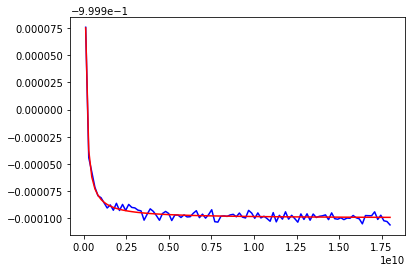

In [4]:
mi = lmfit.minimize(residual, p)
plt.plot(f, s, 'b')
plt.plot(f, residual(mi.params) + s, 'r')
plt.show()

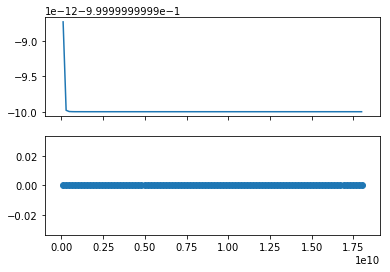

In [32]:
f = np.linspace(1e8, 18e9, 100)
s_noise = conv(s11_complex(f, 50, 1e-9, 1e-9, 1e-9))
r = [s_noise[i].real for i in range(len(s_noise))]
i = [s_noise[i].imag for i in range(len(s_noise))]

p, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, r)
axarr[1].scatter(x, i)
plt.show()

In [75]:
par = lmfit.Parameters()
par.add_many(('z', 50.), ('l0', 1e-9), ('l1', 1e-9), ('l2', 1e-9))

def calculate_complex_residual(p):
    v = p.valuesdict()
    return conv((v['z'] - 2*pi*I*(v['l0']+v['l1']*f+v['l2']*f**2))/(v['z'] + 2*pi*I*(v['l0']+v['l1']*f+v['l2']*f**2)) - s_noise)

def residual(p):
    resid = calculate_complex_residual(p)
    return resid.view(np.complex)
    
mini = lmfit.minimize(residual, par)

# r = [imag_to_float(residual(par))[i].real for i in range(len(imag_to_float(residual(par))))]
# i = [imag_to_float(residual(par))[i].imag for i in range(len(imag_to_float(residual(par))))]
# mod_real = lmfit.minimize(r, p)
# mod_imag = lmfit.minimize(i, p)

# p, axarr = plt.subplots(2, sharex=True)
# axarr[0].plot(f, r, 'b')
# axarr[0].plot(f, (residual(mini.params) + s).real, 'r')
# axarr[1].plot(f, i, 'b')
# axarr[1].plot(f, (residual(mini.params) + s).imag, 'r')
# plt.show()

TypeError: Cannot change data-type for object array.

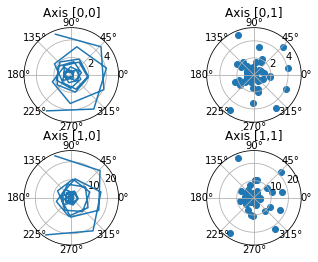

In [37]:
# Four polar axes
p, axarr = plt.subplots(2, 2, subplot_kw=dict(projection='polar'))
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')

# Fine-tune figure; make subplots farther from each other.
p.subplots_adjust(hspace=0.3)
plt.show()